# Project 1 Group 4
### Matthew Adent, Khalil Locke, Chase Mueller, Marcanthony Solorzano

## Setup

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading and Cleaning
filepath = 'data/Spotify_Youtube.csv'
data = pd.read_csv(filepath)
data = data.drop(columns=['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description'])
data.info()
custom_palette = sns.color_palette(["#386641", "#BC4749", "#A7C957", "#F2E8CF", "#6A994E"])
sns.set_palette(custom_palette)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20716 non-null  float64
 5   Energy            20716 non-null  float64
 6   Key               20716 non-null  float64
 7   Loudness          20716 non-null  float64
 8   Speechiness       20716 non-null  float64
 9   Acousticness      20716 non-null  float64
 10  Instrumentalness  20716 non-null  float64
 11  Liveness          20716 non-null  float64
 12  Valence           20716 non-null  float64
 13  Tempo             20716 non-null  float64
 14  Duration_ms       20716 non-null  float64
 15  Title             20248 non-null  object 
 16  Channel           20248 non-null  object

## Question 1

Feature Means by Platform:


,Platform,Danceability,Energy,Loudness,Speechiness,Acousticness,Valence,Liveness,Tempo
0,Spotify,0.654848,0.661409,-6.352386,0.092940,0.204281,0.521417,0.174024,120.365539
1,YouTube,0.666467,0.679268,-5.945230,0.093968,0.226157,0.553263,0.191643,121.644705


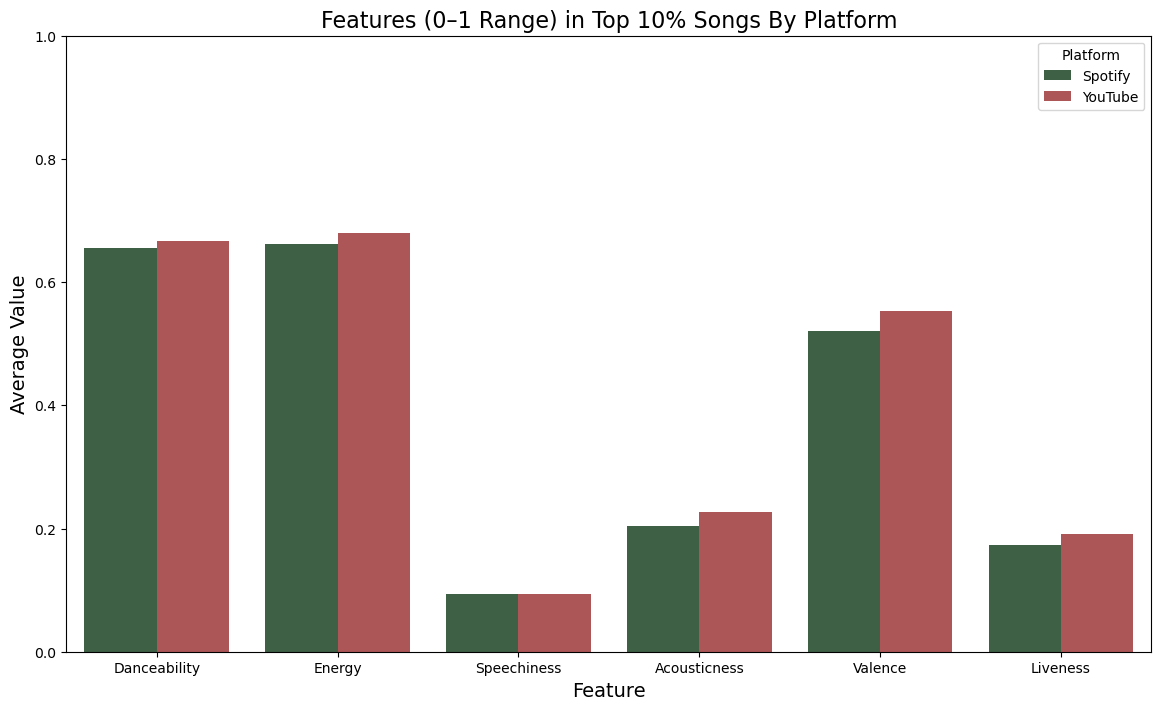

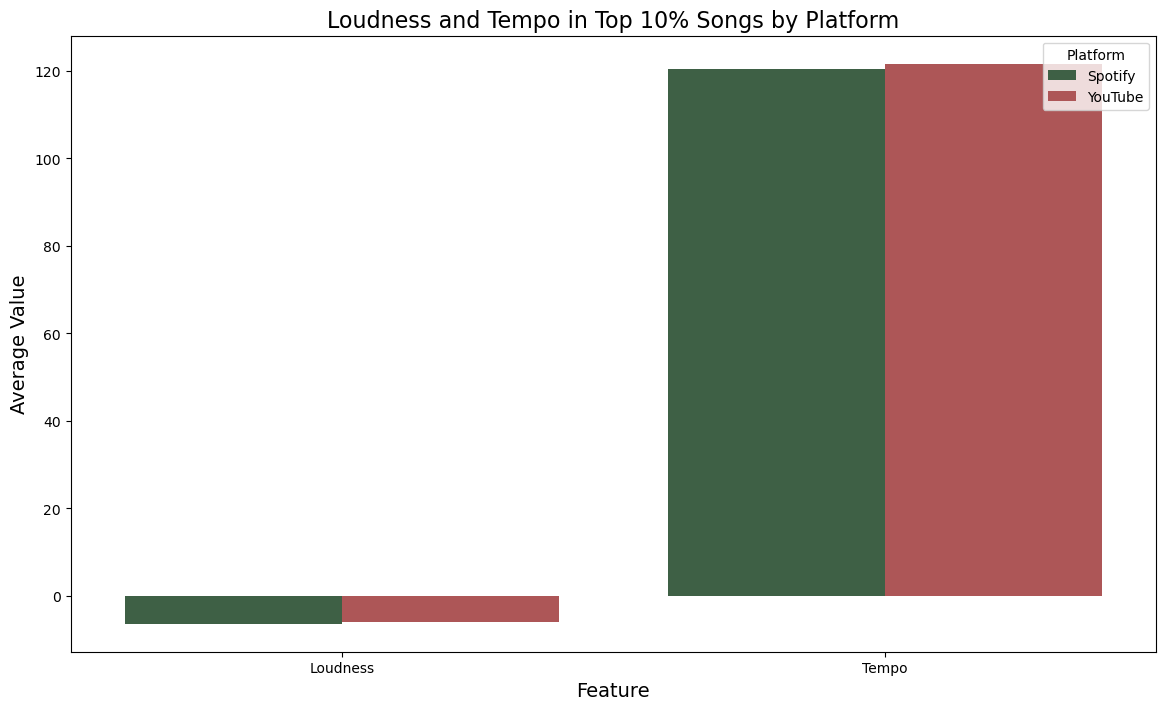

In [47]:
# Define what high views/streams are, then find songs that meet that criteria
threshold_views = data['Views'].quantile(0.9) # 90th percentile aka top 10%
threshold_streams = data['Stream'].quantile(0.9)
top_youtube = data[data['Views'] >= threshold_views].copy() # pandas was mad when I tried to set top_youtube to a view, so I made it a copy instead
top_youtube['Platform'] = 'YouTube'
top_spotify = data[data['Stream'] >= threshold_streams].copy()
top_spotify['Platform'] = 'Spotify'

# Get the means for all the top 10% songs
top_combined = pd.concat([top_youtube, top_spotify])
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Liveness', 'Tempo']
feature_means = top_combined.groupby('Platform')[features].mean().reset_index()

# Show exact values
print("Feature Means by Platform:")
display(feature_means)

# We need the data to be in something called long-format for seaborn apparently, and this does it
feature_means = feature_means.melt(id_vars='Platform', var_name='Feature', value_name='Value')

# Visualization using Seaborn
# Tempo and platform have a large difference in ranges compared to every other feature, so I put them on a separate graph to avoid warping

subset_features_1 = feature_means[~feature_means['Feature'].isin(['Loudness', 'Tempo'])] # ~ is logical not apparently. I think ! is better but whatever.
plt.figure(figsize=(14, 8))
sns.barplot(data=subset_features_1, x='Feature', y='Value', hue='Platform', errorbar=None)
plt.title('Features (0–1 Range) in Top 10% Songs By Platform', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Platform', loc='upper right')
plt.ylim(0, 1)
plt.show()

subset_features_2 = feature_means[feature_means['Feature'].isin(['Loudness', 'Tempo'])]
plt.figure(figsize=(14, 8))
sns.barplot(data=subset_features_2, x='Feature', y='Value', hue='Platform', errorbar=None)
plt.title('Loudness and Tempo in Top 10% Songs by Platform', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Platform', loc='upper right')
plt.show()